In [1]:
!pip install scikit-optimize

     |████████████████████████████████| 100 kB 2.8 MB/s 


In [2]:
!pip install pymatgen

     |████████████████████████████████| 40.6 MB 1.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 109 kB 53.4 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 292 kB 57.6 MB/s 
     |████████████████████████████████| 65 kB 3.6 MB/s 
     |████████████████████████████████| 98 kB 7.4 MB/s 
     |████████████████████████████████| 546 kB 52.1 MB/s 
  Created wheel for pymatgen: filename=pymatgen-2022.0.17-cp37-cp37m-linux_x86_64.whl size=41841034 sha256=b6a234d41b1a77413a355d4ec20827823d26379568dd5eeb23dd751057ed8a0d
  Stored in directory: /root/.cache/pip/wheels/cf/f6/22/58a9be23c5f1b452770e02ff42047175eaf0f9c2f15219fc76
Successfully built pymatgen
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfull

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
import numpy as np
import pandas as pd
import statistics as st
import itertools as it
import pickle as pkl

import scipy
import joblib
import math
import os
import re

import operator
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl

import seaborn as sns
plt.style.use('ggplot')

In [5]:
import sklearn
sklearn.__version__

'1.0.2'

In [6]:
#!pip uninstall scikit-learn -y
#!pip install scikit-learn==0.18.2

In [7]:
#from sklearn.utils.fixes import MaskedArray
# replaced by
from numpy.ma import MaskedArray

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import GenericUnivariateSelect
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import VarianceThreshold

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score, auc
from sklearn.metrics import fbeta_score, make_scorer

from xgboost.sklearn import XGBRegressor

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

import xgboost as xgb
from xgboost import plot_importance
from xgboost import plot_tree

from graphviz import Graph

from scipy.stats import norm

In [9]:
from skopt.space import Real, Categorical, Integer
from skopt.space import Categorical
from skopt.utils import use_named_args
from skopt import gp_minimize
from skopt import BayesSearchCV

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [12]:
MLdf = pd.read_pickle('/content/drive/MyDrive/ColabNotebooks/Fourth_Pass: Ale_DataBase/no-f-matminer-FeaturedData.pkl')
MLdf.head(5)

,material_id,formula,spacegroup,spacegroup_symbol,crystal_system,crossings_+-1eV,crossings_+-2eV,composition,composition_oxid,density,vpa,packing fraction,max packing efficiency,ewald_energy_per_atom,mean absolute deviation in relative bond length,mean neighbor distance variation,mean absolute deviation in relative cell size,structural complexity per atom,structural complexity per cell,frac s valence electrons,frac p valence electrons,frac d valence electrons,frac f valence electrons,max ionic char,avg ionic char,HOMO_energy,LUMO_energy,gap_AO,HOMO_character,HOMO_element,LUMO_character,LUMO_element
0,mp-1111916,K2NaTiF6,225,Fm-3m,cubic,0.0,4.0,"(K, Na, Ti, F)","(K+, Na+, Ti3+, F-)",2.833639,15.414612,0.832127,0.412249,-9.397323,8.289707e-02,0.072261,1.469407e-01,1.570951,15.709506,0.346939,0.612245,0.040816,0.000000,0.917619,0.214087,-0.170010,-0.170010,0.000000,0.0,56.0,0.0,56.0
1,mp-1114332,Na3PdF6,225,Fm-3m,cubic,0.0,4.0,"(Na, Pd, F)","(Na0+, Pd0+, F0+)",3.199327,15.019607,0.585386,0.427854,0.000000,8.378608e-02,0.073153,1.491459e-01,1.570951,15.709506,0.272727,0.545455,0.181818,0.000000,0.902278,0.205192,-0.160771,-0.160771,0.000000,0.0,40.0,0.0,40.0
2,mp-1183466,Ca2PtAu,225,Fm-3m,cubic,8.0,18.0,"(Ca, Pt, Au)","(Ca0+, Pt0+, Au0+)",8.595556,22.805898,0.761536,0.680175,0.000000,5.551115e-17,0.051982,1.168354e-16,1.500000,6.000000,0.113208,0.000000,0.358491,0.528302,0.447278,0.098968,-0.141411,-0.141411,0.000000,2.0,10.0,2.0,10.0
3,mp-1184870,InAgAu2,225,Fm-3m,cubic,2.0,3.0,"(In, Ag, Au)","(In+, Ag+, Au-)",13.370065,19.145765,0.696862,0.680175,-4.347833,1.110223e-16,0.051982,1.391710e-16,1.500000,6.000000,0.067568,0.013514,0.540541,0.378378,0.134459,0.028262,-0.162334,-0.157407,0.004927,2.0,3.0,2.0,0.0
4,mp-1187434,Ti2FeTc,225,Fm-3m,cubic,26.0,112.0,"(Ti, Fe, Tc)","(Ti0+, Fe0+, Tc0+)",7.401171,13.998991,0.799845,0.680175,0.000000,1.110223e-16,0.051982,1.268918e-16,1.500000,6.000000,0.347826,0.000000,0.652174,0.000000,0.031881,0.006662,-0.183636,-0.183636,0.000000,2.0,54.0,2.0,54.0


In [13]:
MLdf.isnull().sum()

material_id                                         0
formula                                             0
spacegroup                                          0
spacegroup_symbol                                   0
crystal_system                                      0
crossings_+-1eV                                     0
crossings_+-2eV                                     0
composition                                         0
composition_oxid                                    0
density                                             3
vpa                                                 3
packing fraction                                    3
max packing efficiency                              0
ewald_energy_per_atom                               0
mean absolute deviation in relative bond length     0
mean neighbor distance variation                    0
mean absolute deviation in relative cell size       0
structural complexity per atom                      0
structural complexity per ce

In [14]:
MLdf = MLdf.dropna()

In [15]:
MLdf.isnull().sum()

material_id                                        0
formula                                            0
spacegroup                                         0
spacegroup_symbol                                  0
crystal_system                                     0
crossings_+-1eV                                    0
crossings_+-2eV                                    0
composition                                        0
composition_oxid                                   0
density                                            0
vpa                                                0
packing fraction                                   0
max packing efficiency                             0
ewald_energy_per_atom                              0
mean absolute deviation in relative bond length    0
mean neighbor distance variation                   0
mean absolute deviation in relative cell size      0
structural complexity per atom                     0
structural complexity per cell                

In [16]:
len(MLdf)

3751

In [17]:
MLdf = MLdf.dropna()

In [18]:
MLdf = MLdf[MLdf['crossings_+-1eV']<=40]

In [19]:
len(MLdf)

3450

In [20]:
MLdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3450 entries, 0 to 3785
Data columns (total 32 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   material_id                                      3450 non-null   object 
 1   formula                                          3450 non-null   object 
 2   spacegroup                                       3450 non-null   int64  
 3   spacegroup_symbol                                3450 non-null   object 
 4   crystal_system                                   3450 non-null   object 
 5   crossings_+-1eV                                  3450 non-null   float64
 6   crossings_+-2eV                                  3450 non-null   float64
 7   composition                                      3450 non-null   object 
 8   composition_oxid                                 3450 non-null   object 
 9   density                       

In [21]:
MLdf.describe()

,spacegroup,crossings_+-1eV,crossings_+-2eV,density,vpa,packing fraction,max packing efficiency,ewald_energy_per_atom,mean absolute deviation in relative bond length,mean neighbor distance variation,mean absolute deviation in relative cell size,structural complexity per atom,structural complexity per cell,frac s valence electrons,frac p valence electrons,frac d valence electrons,frac f valence electrons,max ionic char,avg ionic char,HOMO_energy,LUMO_energy,gap_AO,HOMO_character,HOMO_element,LUMO_character,LUMO_element
count,3450.000000,3450.000000,3450.000000,3450.000000,3450.000000,3450.000000,3450.000000,3450.000000,3.450000e+03,3450.000000,3.450000e+03,3450.000000,3450.000000,3450.000000,3450.000000,3450.000000,3450.000000,3450.000000,3450.000000,3450.000000,3450.000000,3450.000000,3450.000000,3450.000000,3450.000000,3450.000000
mean,222.860870,12.417391,32.806377,7.271290,19.335265,0.689544,0.572313,-8.665375,2.323954e-02,0.058843,4.758249e-02,1.455922,7.844216,0.237282,0.151226,0.453419,0.158073,0.295990,0.060363,-0.201715,-0.184838,0.016877,0.891014,34.913043,0.977391,35.384058
std,3.831521,10.359625,29.189797,3.467235,9.038817,0.169313,0.133012,15.739606,3.503950e-02,0.035176,6.770220e-02,0.298004,7.039500,0.148250,0.182954,0.245039,0.209150,0.296810,0.064404,0.064245,0.057734,0.043285,0.837824,18.025818,0.874933,18.110931
min,216.000000,0.000000,0.000000,0.421495,5.769663,0.034327,0.078606,-106.575696,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.033898,0.000000,0.000000,0.000000,0.000000,0.000000,-0.415606,-0.415606,0.000000,0.000000,0.000000,0.000000,0.000000
25%,225.000000,4.000000,11.000000,4.586335,14.390592,0.595828,0.510131,-9.908305,8.326673e-17,0.051982,1.061812e-16,1.500000,4.754888,0.142857,0.000000,0.250000,0.000000,0.078014,0.013991,-0.239422,-0.206080,0.000000,0.000000,20.000000,0.000000,21.000000
50%,225.000000,10.000000,24.000000,6.966132,17.164498,0.718086,0.680175,0.000000,1.387779e-16,0.051982,1.884637e-16,1.500000,6.000000,0.205128,0.062500,0.463415,0.000000,0.183314,0.034576,-0.186859,-0.172056,0.000000,1.000000,38.000000,1.000000,38.000000
75%,225.000000,18.000000,48.000000,9.264421,20.966786,0.798772,0.680175,0.000000,3.725710e-02,0.053120,1.041667e-01,1.570951,8.000000,0.285714,0.250000,0.673077,0.333333,0.391662,0.080821,-0.154624,-0.149882,0.002077,2.000000,50.000000,2.000000,51.000000
max,225.000000,40.000000,234.000000,21.930120,122.025367,1.348181,0.740480,4.883085,2.773313e-01,0.312633,4.580215e-01,2.370951,84.877124,1.000000,0.687500,0.937500,0.777778,0.921450,0.230363,-0.078699,-0.078699,0.336907,2.000000,62.000000,2.000000,62.000000


In [22]:
np.median(MLdf['crossings_+-1eV'])

10.0

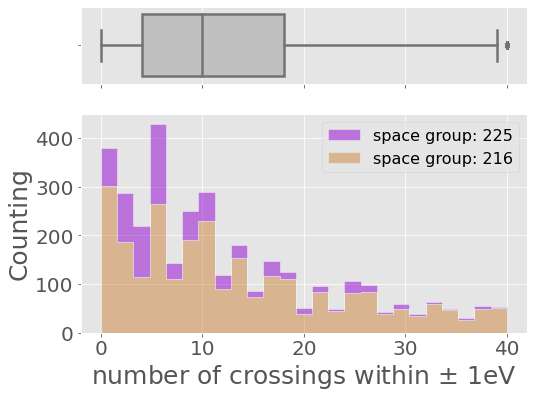

In [74]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.30, .85)}, figsize=(8, 6))

sns.boxplot(x=MLdf['crossings_+-1eV'], 
            #hue="spacegroup_symbol", 
            color='silver', 
            linewidth=2.5, 
            #showmeans=True, 
            ax=ax_box)

sns.histplot(data=MLdf, 
            x=MLdf['crossings_+-1eV'], 
            bins=25, 
            hue="spacegroup", 
            element="step", 
            stat="count", 
            multiple="stack", 
            alpha=0.5, 
            #palette='flare', 
            palette=['darkviolet', 'peru'], 
            legend=True, 
            ax=ax_hist
            )


ax_box.set(xlabel='')

ax_hist.set_xlabel('number of crossings within $\pm$ 1eV', fontsize = 25)
ax_hist.set_ylabel('Counting', fontsize = 25)

ax_hist.xaxis.set_tick_params(labelsize=20, rotation=0)
ax_hist.yaxis.set_tick_params(labelsize=20, rotation=0)
ax_hist.set_xscale("linear")
ax_hist.set_yscale("linear")

legend = ax_hist.get_legend()
handles = legend.legendHandles
legend.remove()
ax_hist.legend(handles, ['space group: 225', 'space group: 216',], 
               fontsize=16, 
               loc='upper right', 
               ncol = 1
               )

plt.xlim(-2, 42)

f.savefig('/content/drive/MyDrive/ColabNotebooks/Fourth_Pass: Ale_DataBase/Features_Matminer/Cubic_EBS_dist.png', 
          bbox_inches='tight', 
          dpi=400
          );

#ax_hist.legend(loc='upper right')

In [24]:
MLdf.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [25]:
len(MLdf.columns)

32

In [26]:
#preview the df
MLdf = MLdf.loc[:,~MLdf.columns.duplicated()]
MLdf.head(5)

,material_id,formula,spacegroup,spacegroup_symbol,crystal_system,crossings_+-1eV,crossings_+-2eV,composition,composition_oxid,density,vpa,packing fraction,max packing efficiency,ewald_energy_per_atom,mean absolute deviation in relative bond length,mean neighbor distance variation,mean absolute deviation in relative cell size,structural complexity per atom,structural complexity per cell,frac s valence electrons,frac p valence electrons,frac d valence electrons,frac f valence electrons,max ionic char,avg ionic char,HOMO_energy,LUMO_energy,gap_AO,HOMO_character,HOMO_element,LUMO_character,LUMO_element
0,mp-1111916,K2NaTiF6,225,Fm-3m,cubic,0.0,4.0,"(K, Na, Ti, F)","(K+, Na+, Ti3+, F-)",2.833639,15.414612,0.832127,0.412249,-9.397323,8.289707e-02,0.072261,1.469407e-01,1.570951,15.709506,0.346939,0.612245,0.040816,0.000000,0.917619,0.214087,-0.170010,-0.170010,0.000000,0.0,56.0,0.0,56.0
1,mp-1114332,Na3PdF6,225,Fm-3m,cubic,0.0,4.0,"(Na, Pd, F)","(Na0+, Pd0+, F0+)",3.199327,15.019607,0.585386,0.427854,0.000000,8.378608e-02,0.073153,1.491459e-01,1.570951,15.709506,0.272727,0.545455,0.181818,0.000000,0.902278,0.205192,-0.160771,-0.160771,0.000000,0.0,40.0,0.0,40.0
2,mp-1183466,Ca2PtAu,225,Fm-3m,cubic,8.0,18.0,"(Ca, Pt, Au)","(Ca0+, Pt0+, Au0+)",8.595556,22.805898,0.761536,0.680175,0.000000,5.551115e-17,0.051982,1.168354e-16,1.500000,6.000000,0.113208,0.000000,0.358491,0.528302,0.447278,0.098968,-0.141411,-0.141411,0.000000,2.0,10.0,2.0,10.0
3,mp-1184870,InAgAu2,225,Fm-3m,cubic,2.0,3.0,"(In, Ag, Au)","(In+, Ag+, Au-)",13.370065,19.145765,0.696862,0.680175,-4.347833,1.110223e-16,0.051982,1.391710e-16,1.500000,6.000000,0.067568,0.013514,0.540541,0.378378,0.134459,0.028262,-0.162334,-0.157407,0.004927,2.0,3.0,2.0,0.0
4,mp-1187434,Ti2FeTc,225,Fm-3m,cubic,26.0,112.0,"(Ti, Fe, Tc)","(Ti0+, Fe0+, Tc0+)",7.401171,13.998991,0.799845,0.680175,0.000000,1.110223e-16,0.051982,1.268918e-16,1.500000,6.000000,0.347826,0.000000,0.652174,0.000000,0.031881,0.006662,-0.183636,-0.183636,0.000000,2.0,54.0,2.0,54.0


In [27]:
len(MLdf.columns)

32

In [28]:
list(MLdf.columns)

['material_id',
 'formula',
 'spacegroup',
 'spacegroup_symbol',
 'crystal_system',
 'crossings_+-1eV',
 'crossings_+-2eV',
 'composition',
 'composition_oxid',
 'density',
 'vpa',
 'packing fraction',
 'max packing efficiency',
 'ewald_energy_per_atom',
 'mean absolute deviation in relative bond length',
 'mean neighbor distance variation',
 'mean absolute deviation in relative cell size',
 'structural complexity per atom',
 'structural complexity per cell',
 'frac s valence electrons',
 'frac p valence electrons',
 'frac d valence electrons',
 'frac f valence electrons',
 'max ionic char',
 'avg ionic char',
 'HOMO_energy',
 'LUMO_energy',
 'gap_AO',
 'HOMO_character',
 'HOMO_element',
 'LUMO_character',
 'LUMO_element']

In [29]:
X = MLdf.drop(['material_id',
 'formula',
 'spacegroup',
 'spacegroup_symbol',
 'crystal_system',
 'crossings_+-1eV',
 'crossings_+-2eV',
 'composition',
 'composition_oxid',
 #'density',
 #'vpa',
 #'packing fraction',
 #'max packing efficiency',
 #'ewald_energy_per_atom',
 #'mean absolute deviation in relative bond length',
 #'mean neighbor distance variation',
 #'mean absolute deviation in relative cell size',
 #'structural complexity per atom',
 #'structural complexity per cell',
 #'frac s valence electrons',
 #'frac p valence electrons',
 #'frac d valence electrons',
 #'frac f valence electrons',
 #'max ionic char',
 #'avg ionic char',
 #'HOMO_energy',
 #'LUMO_energy',
 #'gap_AO',
 #'HOMO_character',
 #'HOMO_element',
 #'LUMO_character',
 #'LUMO_element'
 ], 
 axis=1)
X.head(5)

,density,vpa,packing fraction,max packing efficiency,ewald_energy_per_atom,mean absolute deviation in relative bond length,mean neighbor distance variation,mean absolute deviation in relative cell size,structural complexity per atom,structural complexity per cell,frac s valence electrons,frac p valence electrons,frac d valence electrons,frac f valence electrons,max ionic char,avg ionic char,HOMO_energy,LUMO_energy,gap_AO,HOMO_character,HOMO_element,LUMO_character,LUMO_element
0,2.833639,15.414612,0.832127,0.412249,-9.397323,8.289707e-02,0.072261,1.469407e-01,1.570951,15.709506,0.346939,0.612245,0.040816,0.000000,0.917619,0.214087,-0.170010,-0.170010,0.000000,0.0,56.0,0.0,56.0
1,3.199327,15.019607,0.585386,0.427854,0.000000,8.378608e-02,0.073153,1.491459e-01,1.570951,15.709506,0.272727,0.545455,0.181818,0.000000,0.902278,0.205192,-0.160771,-0.160771,0.000000,0.0,40.0,0.0,40.0
2,8.595556,22.805898,0.761536,0.680175,0.000000,5.551115e-17,0.051982,1.168354e-16,1.500000,6.000000,0.113208,0.000000,0.358491,0.528302,0.447278,0.098968,-0.141411,-0.141411,0.000000,2.0,10.0,2.0,10.0
3,13.370065,19.145765,0.696862,0.680175,-4.347833,1.110223e-16,0.051982,1.391710e-16,1.500000,6.000000,0.067568,0.013514,0.540541,0.378378,0.134459,0.028262,-0.162334,-0.157407,0.004927,2.0,3.0,2.0,0.0
4,7.401171,13.998991,0.799845,0.680175,0.000000,1.110223e-16,0.051982,1.268918e-16,1.500000,6.000000,0.347826,0.000000,0.652174,0.000000,0.031881,0.006662,-0.183636,-0.183636,0.000000,2.0,54.0,2.0,54.0


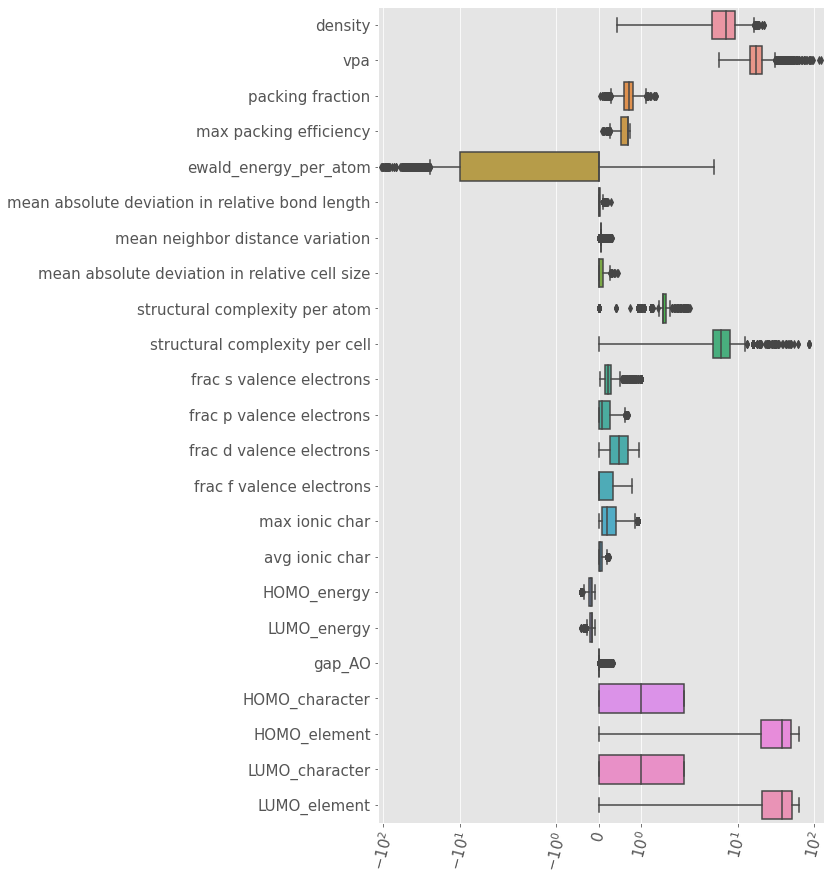

In [30]:
fig, ax = plt.subplots(figsize =(8, 15))
ax = sns.boxplot(data=X, orient='h')
plt.tick_params(axis='both', labelsize = 15)
plt.xscale('symlog')
plt.yticks(rotation=0)
plt.xticks(rotation=75);

In [31]:
Xscaled = RobustScaler(with_centering=True, 
                       with_scaling=True, 
                       quantile_range=(25.0, 75.0)
                       #with_mean=True, 
                       #with_std=True
                       ).fit_transform(X)
Xscaled

array([[-0.8833725 , -0.26609398,  0.56193281, ...,  0.6       ,
        -0.5       ,  0.6       ],
       [-0.80520211, -0.32615989, -0.65387477, ...,  0.06666667,
        -0.5       ,  0.06666667],
       [ 0.34830998,  0.85785187,  0.21409766, ..., -0.93333333,
         0.5       , -0.93333333],
       ...,
       [-1.18411272,  4.83356186,  0.08829928, ...,  0.66666667,
        -0.5       ,  0.66666667],
       [-0.51554438,  0.21480784, -1.60845081, ..., -1.2       ,
         0.        , -1.2       ],
       [-0.04540905, -0.82733536,  0.54582118, ..., -0.66666667,
         0.5       , -0.66666667]])

In [32]:
np.std(Xscaled, axis=0)

array([ 0.7410579 ,  1.37427625,  0.83416319,  0.78210869,  1.58829631,
        0.94034212, 30.89140518,  0.6498469 ,  4.19955065,  2.16894798,
        1.03759949,  0.73170974,  0.57909973,  0.62735787,  0.94617592,
        0.96356685,  0.75751424,  1.02718457, 20.83943226,  0.41885121,
        0.6007735 ,  0.43740312,  0.60361021])

In [33]:
np.mean(Xscaled, axis=0)

array([ 0.0652315 ,  0.33009483, -0.14063991, -0.63431674, -0.87455668,
        0.62376126,  6.02706937,  0.45679187, -0.6212453 ,  0.56830563,
        0.22507704,  0.3549036 , -0.02362542,  0.4742183 ,  0.35924584,
        0.3858508 , -0.1751918 , -0.2274519 ,  8.12643418, -0.05449275,
       -0.10289855, -0.01130435, -0.08719807])

In [34]:
Xscaled_df = pd.DataFrame(data=Xscaled, columns=list(X))
Xscaled_df.head(5)

,density,vpa,packing fraction,max packing efficiency,ewald_energy_per_atom,mean absolute deviation in relative bond length,mean neighbor distance variation,mean absolute deviation in relative cell size,structural complexity per atom,structural complexity per cell,frac s valence electrons,frac p valence electrons,frac d valence electrons,frac f valence electrons,max ionic char,avg ionic char,HOMO_energy,LUMO_energy,gap_AO,HOMO_character,HOMO_element,LUMO_character,LUMO_element
0,-0.883373,-0.266094,0.561933,-1.575629e+00,-0.948429,2.225000e+00,1.781249e+01,1.410631e+00,1.0,2.99204,0.992674,2.198980,-0.998869,0.000000,2.341174,2.686077,0.198696,0.036407,0.000000,-0.5,0.600000,-0.5,0.600000
1,-0.805202,-0.326160,-0.653875,-1.483861e+00,0.000000,2.248862e+00,1.859516e+01,1.431800e+00,1.0,2.99204,0.473193,1.931818,-0.665592,0.000000,2.292261,2.552976,0.307649,0.200808,0.000000,-0.5,0.066667,-0.5,0.066667
2,0.348310,0.857852,0.214098,1.958714e-15,0.000000,-2.234922e-15,-1.218929e-14,-6.876322e-16,0.0,0.00000,-0.643445,-0.250000,-0.248002,1.584906,0.841593,0.963509,0.535956,0.545304,0.000000,0.5,-0.933333,0.5,-0.933333
3,1.368922,0.301279,-0.104582,2.611618e-15,-0.438807,-7.449740e-16,-1.828394e-14,-4.732100e-16,0.0,0.00000,-0.962924,-0.195946,0.182298,1.135135,-0.155763,-0.094492,0.289217,0.260668,2.372457,0.5,-1.166667,0.5,-1.266667
4,0.092995,-0.481359,0.402867,1.958714e-15,0.000000,-7.449740e-16,-2.437858e-14,-5.910906e-16,0.0,0.00000,0.998885,-0.250000,0.446158,0.000000,-0.482811,-0.417690,0.038008,-0.206057,0.000000,0.5,0.533333,0.5,0.533333


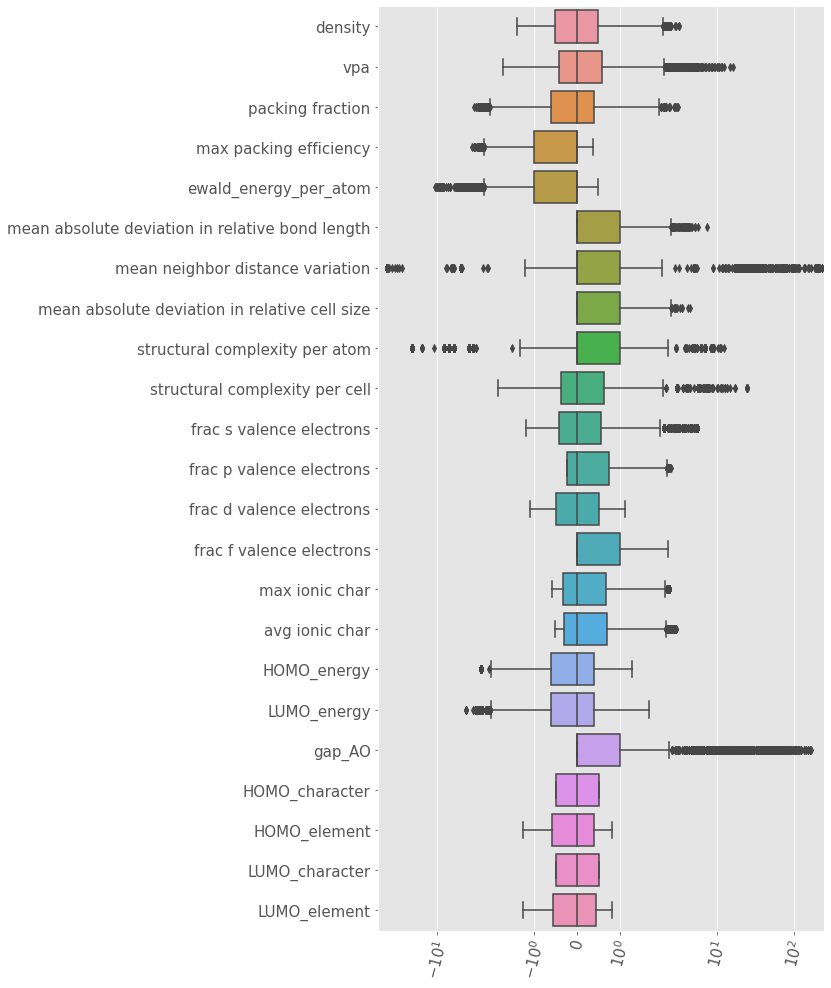

In [35]:
fig, ax = plt.subplots(figsize =(8, 17))
ax = sns.boxplot(data=Xscaled_df, orient='h')
plt.tick_params(axis='both', labelsize = 15)
plt.xscale('symlog')
plt.yticks(rotation=0)
plt.xticks(rotation=75);

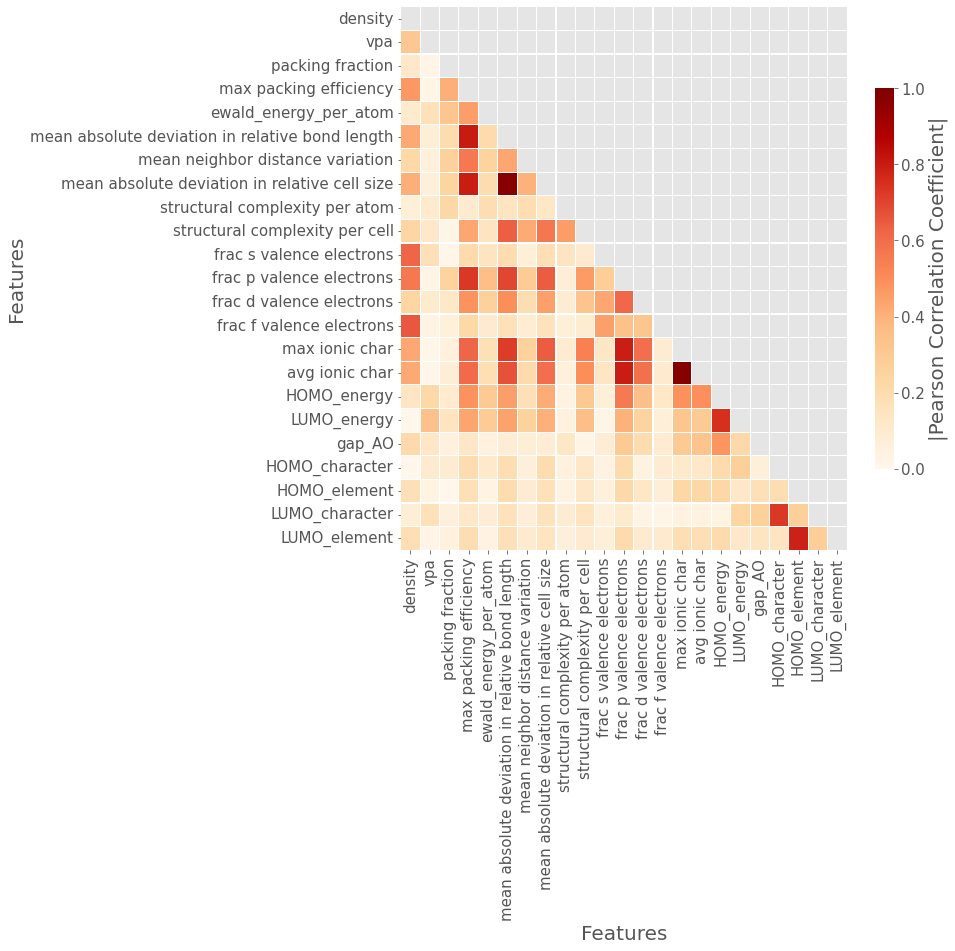

In [36]:
matrix = np.triu(Xscaled_df.corr(method ='pearson').abs())

f, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(Xscaled_df.corr(method ='pearson').abs(), 
                 mask=matrix, 
                 cmap='OrRd', 
                 linecolor='white', 
                 linewidths=0.1, 
                 #annot=True, 
                 #annot_kws={'fontsize': 10, 
                       #'weight': 'bold'
                 #     }, 
                 #fmt='.2f', 
                 vmin=0, 
                 vmax=1, 
                 cbar_kws={'label': '|Pearson Correlation Coefficient|',  
                           #'extend': 'both', 
                           'shrink':0.7}
                )

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)
ax.figure.axes[-1].yaxis.label.set_size(20)

ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_tick_params(labelsize=15)

ax.set_ylabel('Features', fontsize = 20)
ax.set_xlabel('Features', fontsize = 20);
f.savefig('/content/drive/MyDrive/ColabNotebooks/Fourth_Pass: Ale_DataBase/Features_Matminer/Cubic_Feature_Correlation_Pearson.png', 
          bbox_inches='tight', 
          dpi=400
          );

In [37]:
y = MLdf['crossings_+-1eV']
y.head(5)

0     0.0
1     0.0
2     8.0
3     2.0
4    26.0
Name: crossings_+-1eV, dtype: float64

In [38]:
X_train, X_test, y_train, y_test = train_test_split(Xscaled_df, y, 
                                                    test_size=0.3, 
                                                    shuffle=True, 
                                                    random_state=1
                                                   )

In [39]:
df_y_train = pd.DataFrame(y_train)
df_y_train.head(5)

,crossings_+-1eV
1616,29.0
1217,32.0
1738,4.0
3173,9.0
110,5.0


In [40]:
df_y_test = pd.DataFrame(y_test)
df_y_test.head(5)

,crossings_+-1eV
1524,3.0
2783,4.0
2378,10.0
2154,4.0
98,6.0


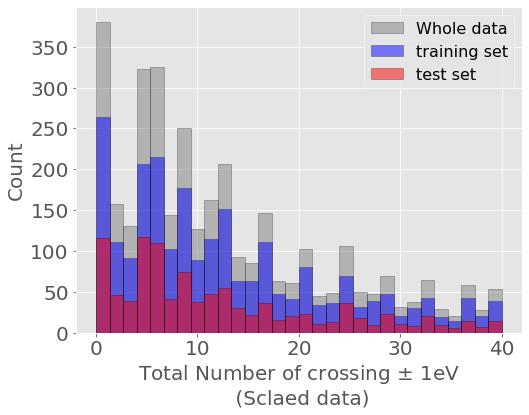

In [41]:
fig, ax = plt.subplots(figsize =(8, 6))
plt.hist(MLdf['crossings_+-1eV'], 
         color = 'grey', 
         edgecolor = 'black',
         bins = 30, 
         alpha=0.5, 
         label='Whole data')

plt.hist(y_train, 
         color = 'blue', 
         edgecolor = 'black',
         bins = 30, 
         alpha=0.5,
         label='training set')

plt.hist(y_test, 
         color = 'red', 
         edgecolor = 'black',
         bins = 30, 
         alpha=0.5, 
         label='test set')

plt.xlabel('Total Number of crossing $\pm$ 1eV\n (Sclaed data)', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.legend(loc='upper right', fontsize = 16, ncol = 1).get_frame().set_edgecolor('w')
plt.grid(True)

plt.tick_params(axis='both', labelsize = 20)

https://www.kaggle.com/tilii7/hyperparameter-grid-search-with-xgboost

In [42]:
estimator = xgb.XGBRegressor()

print(estimator.get_params().keys())

param_grid   = {"booster":           ['gbtree'], 
                'objective':         ['reg:squarederror'],
                'eval_metric':       ['mae'],
                "learning_rate":     (0.01, 3.0, "uniform"),  
                "max_depth":         (1, 50, "uniform"), 
                "max_delta_step":    (0, 10.0, "uniform"), 
                "subsample":         (0.01, 1.0, "uniform"), 
                "colsample_bytree":  (0.01, 1.0, "uniform"), 
                "colsample_bylevel": (0.01, 1.0, "uniform"), 
                "reg_lambda":        (1, 1000, "uniform"), 
                "reg_alpha":         (1e-9, 3.0, "uniform"), 
                "gamma":             (1e-9, 3.0, "uniform"), 
                "min_child_weight":  (0, 10, "uniform"),  
                "scale_pos_weight":  (1, 500, "uniform")
                }

ss = ShuffleSplit(n_splits=7, test_size=0.30, random_state=0)

gbm = BayesSearchCV(estimator=estimator, 
                    search_spaces=param_grid, 
                    cv=ss, 
                    n_iter=150, 
                    n_points=10, 
                    optimizer_kwargs={'base_estimator': 'GBRT', 
                                      'acq_optimizer': 'sampling',
                                      'initial_point_generator':'grid'
                                      }, 
                    #iid=False, 
                    verbose=0, 
                    n_jobs=-1, 
                    refit=True)

gbm.fit(X_train, y_train)
best = gbm.best_estimator_;

dict_keys(['base_score', 'booster', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'gamma', 'importance_type', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'n_estimators', 'n_jobs', 'nthread', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'seed', 'silent', 'subsample', 'verbosity'])


In [43]:
# save the model to disk
#pkl.dump(best, open('/content/drive/MyDrive/ColabNotebooks/Fourth_Pass: Ale_DataBase/Features_Matminer/ML_model.sav', 'wb'))

In [44]:
estimator.importance_type

'gain'

In [45]:
df0 = pd.DataFrame(gbm.cv_results_)
df0.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_booster,param_colsample_bylevel,param_colsample_bytree,param_eval_metric,param_gamma,param_learning_rate,param_max_delta_step,param_max_depth,param_min_child_weight,param_objective,param_reg_alpha,param_reg_lambda,param_scale_pos_weight,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,mean_test_score,std_test_score,rank_test_score
0,0.358514,0.068363,0.012069,0.001319,gbtree,0.505,0.2575,mae,1.5,2.2525,5,38,2,reg:squarederror,1.5,500,375,0.7525,"{'booster': 'gbtree', 'colsample_bylevel': 0.5...",0.015237,0.043975,-0.060468,-0.211230,0.095630,0.049917,-0.503108,-0.081435,0.195949,126
1,0.315135,0.006684,0.011954,0.000831,gbtree,0.505,0.2575,mae,1.5,1.505,5,38,2,reg:squarederror,0.75,251,375,0.505,"{'booster': 'gbtree', 'colsample_bylevel': 0.5...",0.286769,0.218999,0.230029,0.279942,0.213742,0.160364,0.151476,0.220189,0.048468,104
2,0.488692,0.014232,0.013074,0.002078,gbtree,0.505,0.505,mae,1.5,0.7575,8,26,8,reg:squarederror,2.25,750,250,0.7525,"{'booster': 'gbtree', 'colsample_bylevel': 0.5...",0.397670,0.387640,0.401921,0.384491,0.414276,0.400068,0.366850,0.393274,0.014084,16
3,0.133820,0.003836,0.006861,0.000205,gbtree,0.2575,0.2575,mae,2.25,2.2525,2,26,8,reg:squarederror,2.25,500,126,0.2575,"{'booster': 'gbtree', 'colsample_bylevel': 0.2...",-0.833585,-1.264821,-0.951326,-0.774663,-1.135471,-0.836410,-0.960669,-0.965278,0.164400,138
4,0.779838,0.017085,0.011298,0.000198,gbtree,0.7525,0.7525,mae,2.25,2.2525,2,38,5,reg:squarederror,0.75,500,375,0.505,"{'booster': 'gbtree', 'colsample_bylevel': 0.7...",-0.039216,-0.042636,-0.021779,0.001351,0.041230,0.056623,-0.052026,-0.008065,0.039622,123


In [46]:
gbm.best_params_

OrderedDict([('booster', 'gbtree'),
             ('colsample_bylevel', 0.23600926712835912),
             ('colsample_bytree', 0.4938880682674631),
             ('eval_metric', 'mae'),
             ('gamma', 0.1290355991338865),
             ('learning_rate', 0.24469666428132725),
             ('max_delta_step', 3),
             ('max_depth', 12),
             ('min_child_weight', 2),
             ('objective', 'reg:squarederror'),
             ('reg_alpha', 2.6371377550056248),
             ('reg_lambda', 49),
             ('scale_pos_weight', 367),
             ('subsample', 0.9817614842175052)])

In [47]:
gbm.best_index_

149

In [48]:
gbm.n_splits_

7

In [49]:
gbm.multimetric_

False

In [50]:
y_pred_train = best.predict(X_train)
y_pred_train

array([29.337784 , 15.1929865,  5.7790112, ..., 22.354204 , 19.522158 ,
       27.509212 ], dtype=float32)

In [51]:
y_pred_test = best.predict(X_test)

The rmse train: 4.200284237691771
The rmse test: 7.622892905358859
The MAE train: 2.9922655378809626
The MAE test: 5.634565209766517
The R^2 train: 0.8359173032599421
The R^2 test: 0.4544808348337821


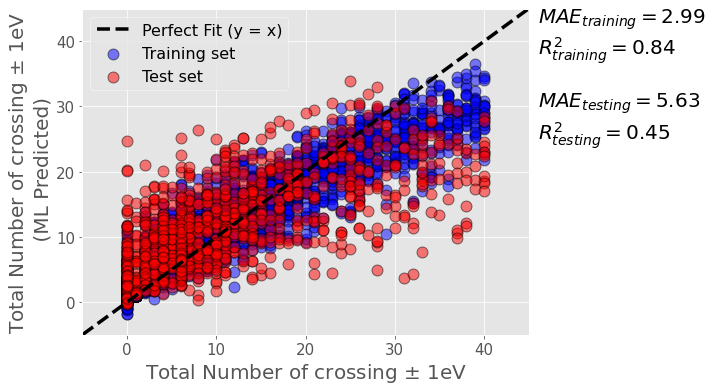

In [52]:
x_ref_line = [-10, 100]
y_ref_line = [-10, 100]

x_ref_line_2 = np.linspace(-10, 10, 100)
y_ref_line_2 = np.linspace(-10, 10, 100)

# Print Result and Output figure
x1 = np.array(y_train)
y1 = np.array(y_pred_train)
x2 = np.array(y_test)
y2 = np.array(y_pred_test)

print('The rmse train:', mean_squared_error(y_train, y_pred_train, squared=False))
print('The rmse test:', mean_squared_error(y_test, y_pred_test, squared=False))
print('The MAE train:', mean_absolute_error(y_train, y_pred_train))
print('The MAE test:', mean_absolute_error(y_test, y_pred_test))
print('The R^2 train:', r2_score(y_train, y_pred_train))
print('The R^2 test:', r2_score(y_test, y_pred_test))

fig = plt.figure(figsize=(8, 6))
#plt.fill_between(x_ref_line_2, y_ref_line_2 - 1.0, y_ref_line_2 + 1.0, 
#                 color = '#546223', alpha=0.3, label='+/- 1eV')

z = np.polyfit(x1, y1, 1)
p = np.poly1d(z)
plt.plot(x_ref_line, y_ref_line, 'k--', linewidth=3.5, label='Perfect Fit (y = x)')
#plt.plot(x1,p(x1),'--', color = 'dodgerblue', linewidth=3.5, label='Best Fit')

plt.scatter(x1, y1, s=120, c='blue', alpha=0.5, edgecolors='k', linewidths=1, label='Training set')
plt.scatter(x2, y2, s=120, c='red', alpha=0.5, edgecolors='k', linewidths=1, label='Test set')

plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.xlabel('Total Number of crossing $\pm$ 1eV', fontsize = 20)
plt.ylabel('Total Number of crossing $\pm$ 1eV \n (ML Predicted)', fontsize = 20)
plt.tick_params(axis='both', labelsize = 15)
plt.legend(loc='upper left', fontsize = 16, ncol = 1).get_frame().set_edgecolor('w')
plt.grid(True)

plt.xlim(-5, 45)
plt.ylim(-5, 45);
text_kwargs = dict(fontsize=20, 
                   color='k'
                  )

plt.text(46, 25, 
         (r'$MAE_{2}={0:.2f}$' + '\n' \
          + r'$R^2_{2}={1:.2f}$' + '\n' \
          + '\n' \
          + r'$MAE_{5}={3:.2f}$' + '\n' \
          +  r'$R^2_{5}={4:.2f}$'
          ).format(mean_absolute_error(y_train, y_pred_train), 
                   r2_score(y_train, y_pred_train), 
                   '{training}', 
                   mean_absolute_error(y_test, y_pred_test), 
                   r2_score(y_test, y_pred_test), 
                   '{testing}'
                   ),
          **text_kwargs
        );

In [53]:
residuals_training = [y_train_i - y_pred_train_i for y_train_i, y_pred_train_i in zip(y_train, y_pred_train)]
#error_training

In [54]:
residuals_testing = [y_test_i - y_pred_test_i for y_test_i, y_pred_test_i in zip(y_test, y_pred_test)]
#error_testing

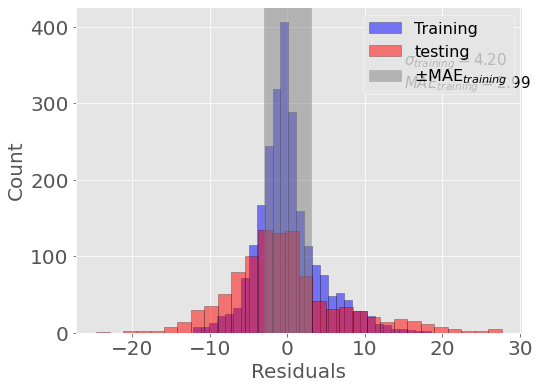

In [55]:
fig, ax = plt.subplots(figsize =(8, 6))

plt.hist(residuals_training, 
         color = 'blue', 
         edgecolor = 'black',
         bins = 30, 
         alpha=0.5,
         label='Training')

plt.hist(residuals_testing, 
         color = 'red', 
         edgecolor = 'black',
         bins = 30, 
         alpha=0.5, 
         label='testing')

ax.axvspan(-mean_absolute_error(y_train, y_pred_train), 
            mean_absolute_error(y_train, y_pred_train), 
            alpha=0.5, 
            color='grey', 
            label='$\pm$MAE$_{training}$')

plt.legend(loc='upper right', fontsize = 16, ncol = 1).get_frame().set_edgecolor('w')
plt.xlabel('Residuals', fontsize = 20)
plt.ylabel('Count', fontsize = 20)

text_kwargs = dict(fontsize=15, 
                   #ha='center', 
                   #va='center', 
                   #color='gray'
                  )

ax.text(15, 320, 
        (r'$\sigma_{1}={0:.2f}$' + '\n' + r'$MAE_{1}={2:.2f}$' ).format(np.std(residuals_training), 
                                         '{training}', 
                                         mean_absolute_error(y_train, y_pred_train)
                                        ), 
        **text_kwargs)



plt.tick_params(axis='both', labelsize = 20);

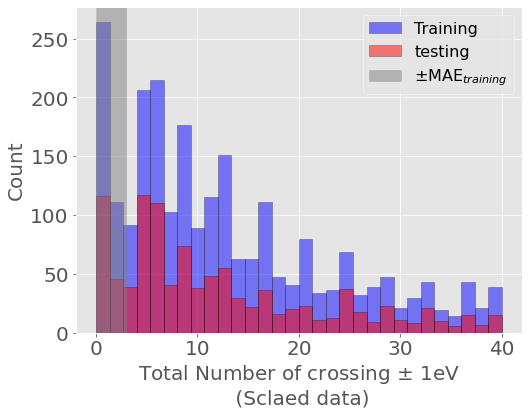

In [56]:
fig, ax = plt.subplots(figsize =(8, 6))

plt.hist(y_train, 
         color = 'blue', 
         edgecolor = 'black',
         bins = 30, 
         alpha=0.5,
         label='Training')

plt.hist(y_test, 
         color = 'red', 
         edgecolor = 'black',
         bins = 30, 
         alpha=0.5, 
         label='testing')

ax.axvspan(0, 
            mean_absolute_error(y_train, y_pred_train), 
            alpha=0.5, 
            color='grey', 
            label='$\pm$MAE$_{training}$')

plt.legend(loc='upper right', fontsize = 16, ncol = 1).get_frame().set_edgecolor('w')
plt.xlabel('Total Number of crossing $\pm$ 1eV\n (Sclaed data)', fontsize = 20)
plt.ylabel('Count', fontsize = 20)

plt.tick_params(axis='both', labelsize = 20);

In [57]:
sum(i <= mean_absolute_error(y_train, y_pred_train) for i in y_pred_train)

242

In [58]:
len(y_pred_train)

2415

In [59]:
sum(i <= mean_absolute_error(y_train, y_pred_train) for i in y_pred_train) / len(y_pred_train) * 100

10.020703933747411

In [60]:
sum(i <= mean_absolute_error(y_test, y_pred_test) for i in y_pred_test)

183

In [61]:
len(y_pred_test)

1035

In [62]:
sum(i <= mean_absolute_error(y_test, y_pred_test) for i in y_pred_test) / len(y_pred_test) * 100

17.681159420289855

(-35.0, 35.0)

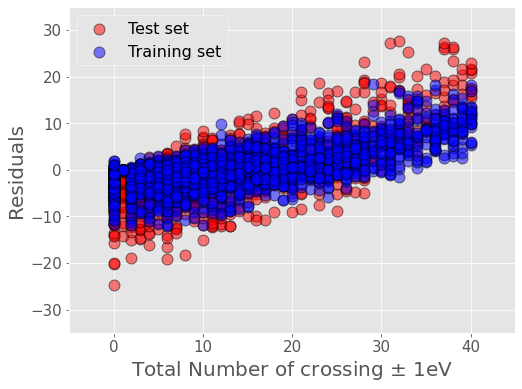

In [63]:
fig = plt.figure(figsize=(8, 6))

plt.scatter(x2, residuals_testing, s=120, c='red', alpha=0.5, edgecolors='k', linewidths=1, label='Test set')
plt.scatter(x1, residuals_training, s=120, c='blue', alpha=0.5, edgecolors='k', linewidths=1, label='Training set')

plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.xlabel('Total Number of crossing $\pm$ 1eV', fontsize = 20)
plt.ylabel('Residuals', fontsize = 20)
plt.tick_params(axis='both', labelsize = 15)
plt.legend(loc='upper left', fontsize = 16, ncol = 1).get_frame().set_edgecolor('w')
plt.grid(True)

plt.xlim(-5, 45)
plt.ylim(-35, 35)
#text_kwargs = dict(fontsize=20, 
#                   #ha='center', 
#                   #va='center', 
#                   color='k'
#                  )

#plt.text(30, -4, 
#         (r'$MAE={:.2f}$' + '\n' + r'$RMSE={:.2f}$' + '\n' + r'$R^2={:.2f}$').format(mean_absolute_error(y_train, y_pred_train), 
#                                                                                               mean_squared_error(y_train, y_pred_train, squared=False), 
#                                                                                               r2_score(y_train, y_pred_train)
#                                                                                              ), **text_kwargs
#        )


# Feature Importances

In [64]:
imp = pd.DataFrame(best.feature_importances_, 
                   columns = ['Importance'], 
                   index = Xscaled_df.columns)

imp = imp.sort_values(['Importance'], ascending = False)
imp

,Importance
HOMO_element,0.120989
LUMO_character,0.112460
structural complexity per cell,0.070016
max packing efficiency,0.061057
density,0.052024
mean neighbor distance variation,0.048430
LUMO_element,0.046355
frac d valence electrons,0.046082
structural complexity per atom,0.043973
max ionic char,0.040460


In [65]:
imp['Features'] = imp.index
imp

,Importance,Features
HOMO_element,0.120989,HOMO_element
LUMO_character,0.112460,LUMO_character
structural complexity per cell,0.070016,structural complexity per cell
max packing efficiency,0.061057,max packing efficiency
density,0.052024,density
mean neighbor distance variation,0.048430,mean neighbor distance variation
LUMO_element,0.046355,LUMO_element
frac d valence electrons,0.046082,frac d valence electrons
structural complexity per atom,0.043973,structural complexity per atom
max ionic char,0.040460,max ionic char


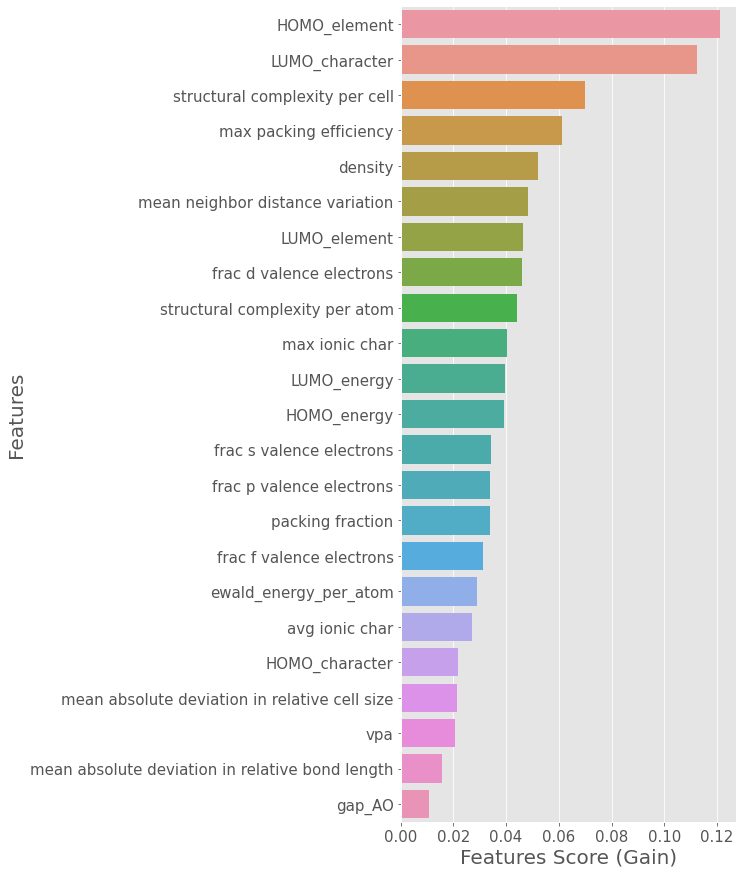

In [66]:
fig = plt.figure(figsize=(6, 15))

ax = sns.barplot(y="Features", x="Importance", data=imp)

plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.xlabel('Features Score (Gain)', fontsize = 20)
plt.ylabel('Features', fontsize = 20)
plt.tick_params(axis='both', labelsize = 15)
plt.tick_params(axis='y', rotation = 0);

In [67]:
list(imp['Features'])

['HOMO_element',
 'LUMO_character',
 'structural complexity per cell',
 'max packing efficiency',
 'density',
 'mean neighbor distance variation',
 'LUMO_element',
 'frac d valence electrons',
 'structural complexity per atom',
 'max ionic char',
 'LUMO_energy',
 'HOMO_energy',
 'frac s valence electrons',
 'frac p valence electrons',
 'packing fraction',
 'frac f valence electrons',
 'ewald_energy_per_atom',
 'avg ionic char',
 'HOMO_character',
 'mean absolute deviation in relative cell size',
 'vpa',
 'mean absolute deviation in relative bond length',
 'gap_AO']

In [68]:
len(list(imp['Features']))

23

In [69]:
# Electronic Properties:
EP  = np.array([imp.loc['LUMO_character', 'Importance'], 
                imp.loc['LUMO_energy', 'Importance'], 
                imp.loc['LUMO_element', 'Importance'], 
                imp.loc['frac d valence electrons', 'Importance'], 
                imp.loc['HOMO_element', 'Importance'], 
                imp.loc['HOMO_character', 'Importance'], 
                imp.loc['avg ionic char', 'Importance'], 
                imp.loc['max ionic char', 'Importance'], 
                imp.loc['frac s valence electrons', 'Importance'], 
                imp.loc['frac p valence electrons', 'Importance'], 
                imp.loc['gap_AO', 'Importance'], 
                imp.loc['HOMO_energy', 'Importance'], 
                imp.loc['ewald_energy_per_atom', 'Importance'], 
                imp.loc['frac f valence electrons', 'Importance'], 
                ])

print('Electronic Prop.: %9.3f' % np.sum(EP))

# Size Properties:
#SP  = np.array([imp['radius_ac_1_oct'], 
#                imp['radius_ac_2_oct'], 
#                imp['LCx_ac_1_oct'], 
#                imp['LCx_ac_2_oct'], 
#                imp['LCz_ac_1_oct'], 
#                imp['LCz_ac_2_oct'], 
#                imp['iradius_ac_1_oct'], 
#                imp['iradius_ac_2_oct']
#                ])

#print('Size Prop.: %15.3f' % np.sum(SP))

# Crystal Properties:
CP  = np.array([imp.loc['structural complexity per cell', 'Importance'], 
                imp.loc['structural complexity per atom', 'Importance'], 
                imp.loc['vpa', 'Importance'], 
                imp.loc['max packing efficiency', 'Importance'], 
                imp.loc['packing fraction', 'Importance'], 
                imp.loc['mean neighbor distance variation', 'Importance'], 
                imp.loc['mean absolute deviation in relative cell size', 'Importance'], 
                imp.loc['mean absolute deviation in relative bond length', 'Importance']
                ])

print('Crys. Prop.: %15.3f' % np.sum(CP))

# Bulk Properties:
BP  = np.array([imp.loc['density', 'Importance']
                ])

print('Bulk Prop.: %15.3f' % np.sum(BP))

Electronic Prop.:     0.633
Crys. Prop.:           0.315
Bulk Prop.:           0.052


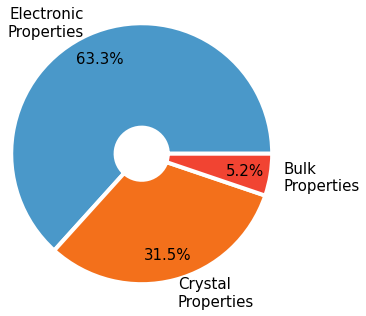

In [70]:
# Make data: I have 5 groups and 52 subgroups
group_names = ['Electronic\nProperties', 'Crystal\nProperties', 'Bulk\nProperties']

group_size = [np.sum(EP), 
              np.sum(CP), 
              np.sum(BP)]

# Create colors
a, b, c = [plt.cm.Blues, 
            plt.cm.Oranges, 
            #plt.cm.Greens, 
            #plt.cm.Purples, 
            #plt.cm.Greys, 
            plt.cm.Reds]

# First Ring (outside)
fig, ax = plt.subplots()
wedgeprops = {'linewidth': 4, 
              'width':1.2, 
              'edgecolor':'w'}
textprops = {'fontsize':15, 'color':'k'}
ax.pie(group_size, 
       radius = 1.5, 
       colors = [a(0.6), b(0.6), c(0.6)], 
       autopct = '%1.1f%%', 
       pctdistance = 0.8, 
       startangle=0, 
       labels = group_names, 
       labeldistance = 1.1, 
       wedgeprops = wedgeprops, 
       textprops = textprops
       )
plt.show;
#fig.savefig('FI_DeltaE_1_weight.png', bbox_inches='tight', dpi=400);

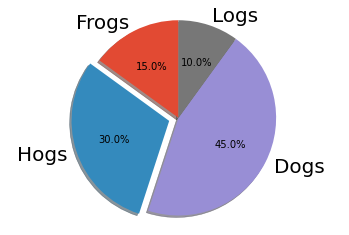

In [71]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

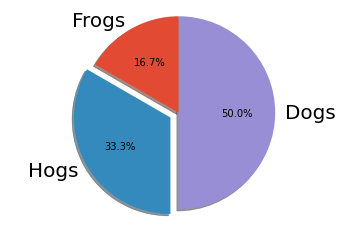

In [72]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs'
sizes = [15, 30, 45]
explode = (0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

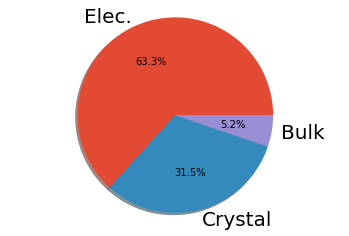

In [73]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Elec.', 'Crystal', 'Bulk', 
sizes = [np.sum(EP), np.sum(CP), np.sum(BP)]
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, 
        #explode=explode, 
        labels=labels, 
        autopct='%1.1f%%',
        shadow=True, 
        startangle=0)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()